In [14]:
import pandas as pd
df = pd.read_csv(r"C:\Users\aryan\Desktop\Perry's IceCream\wip_all_matrics.csv")
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414 entries, 0 to 1413
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   WorkCenter         1414 non-null   object 
 1   RunCode            1414 non-null   object 
 2   StartDateTime      1414 non-null   float64
 3   EndDateTime        1414 non-null   float64
 4   StartDate          1414 non-null   object 
 5   StartTime          1414 non-null   object 
 6   EndDate            1414 non-null   object 
 7   EndTime            1414 non-null   object 
 8   RunDuration        1414 non-null   object 
 9   ProductCode        1414 non-null   object 
 10  TargetWeightInLbs  1414 non-null   float64
 11  UpSeconds          1414 non-null   int64  
 12  UpTime             1414 non-null   object 
 13  InCount            1414 non-null   float64
 14  UpTimeRatio        1414 non-null   object 
 15  DownTimeRatio      1414 non-null   object 
 16  TrueSpeed          1414 

,StartDateTime,EndDateTime,TargetWeightInLbs,UpSeconds,InCount,TrueSpeed,ThroughputSpeed
count,1.414000e+03,1.414000e+03,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000
mean,2.025043e+07,2.025044e+07,4.122489,16864.821782,24228.740099,77.105436,57.440998
std,1.967888e+02,1.966532e+02,5.322981,10000.891693,30025.863572,62.492250,50.269526
min,2.025011e+07,2.025011e+07,0.520000,241.000000,6.000000,1.493776,0.008439
25%,2.025030e+07,2.025030e+07,1.070000,10208.750000,7533.500000,39.853854,20.534699
50%,2.025042e+07,2.025042e+07,1.790000,14041.000000,12515.500000,61.401234,50.588879
75%,2.025061e+07,2.025061e+07,1.940000,21297.250000,28950.750000,82.363191,65.988678
max,2.025073e+07,2.025073e+07,21.520000,65121.000000,197952.000000,335.612104,279.584616


In [19]:
import pandas as pd

# Load your dataset
df = pd.read_csv(r"C:\Users\aryan\Desktop\Perry's IceCream\wip_all_matrics.csv")

# 1️⃣ Display the data types of all columns
print("\n--- COLUMN DATA TYPES ---")
print(df.dtypes)
print("\n")

# 2️⃣ Display number of unique values and missing values
print("--- UNIQUE + MISSING VALUES ---")
summary = pd.DataFrame({
    'DataType': df.dtypes,
    'UniqueValues': df.nunique(),
    'MissingValues': df.isnull().sum()
})
print(summary)

# 3️⃣ Identify potential numeric columns stored as strings (object)
print("\n--- POTENTIAL NUMERIC COLUMNS (object type but look numeric) ---")
for col in df.select_dtypes(include='object').columns:
    sample = df[col].dropna().astype(str).head(5).tolist()
    if all(any(ch.isdigit() for ch in val) for val in sample):
        print(f"⚠️  {col} might be numeric. Sample values: {sample}")

# 4️⃣ Optional: convert clearly numeric columns
# (run only after you confirm visually)
# for col in ['UpSeconds','InCount','TrueSpeed','ThroughputSpeed','SpeedEfficiency']:
#     df[col] = pd.to_numeric(df[col], errors='coerce')

# 5️⃣ Optional: convert date/time columns
# for col in ['StartDateTime','EndDateTime','StartDate','EndDate']:
#     df[col] = pd.to_datetime(df[col], errors='coerce')

# 6️⃣ Save an info summary file if needed
df.info(verbose=True)



--- COLUMN DATA TYPES ---
WorkCenter            object
RunCode               object
StartDateTime        float64
EndDateTime          float64
StartDate             object
StartTime             object
EndDate               object
EndTime               object
RunDuration           object
ProductCode           object
TargetWeightInLbs    float64
UpSeconds              int64
UpTime                object
InCount              float64
UpTimeRatio           object
DownTimeRatio         object
TrueSpeed            float64
ThroughputSpeed      float64
SpeedEfficiency       object
dtype: object


--- UNIQUE + MISSING VALUES ---
                  DataType  UniqueValues  MissingValues
WorkCenter          object             7              0
RunCode             object          1414              0
StartDateTime      float64          1324              0
EndDateTime        float64          1331              0
StartDate           object           174              0
StartTime           object          13

In [20]:
import pandas as pd
from datetime import datetime

# Load data
df = pd.read_csv(r"C:\Users\aryan\Desktop\Perry's IceCream\wip_all_matrics.csv")

# ---------- Convert date and time ----------
# Convert StartDate and EndDate (object -> datetime)
df["StartDate"] = pd.to_datetime(df["StartDate"], errors="coerce", dayfirst=True)
df["EndDate"]   = pd.to_datetime(df["EndDate"], errors="coerce", dayfirst=True)

# Combine date and time into full datetime columns
df["Start_Full"] = pd.to_datetime(df["StartDate"].astype(str) + " " + df["StartTime"].astype(str), errors="coerce")
df["End_Full"]   = pd.to_datetime(df["EndDate"].astype(str) + " " + df["EndTime"].astype(str), errors="coerce")

# ---------- Convert durations ----------
df["RunDuration_td"] = pd.to_timedelta(df["RunDuration"], errors="coerce")
df["RunDuration_hr"] = df["RunDuration_td"].dt.total_seconds() / 3600

df["UpTime_td"] = pd.to_timedelta(df["UpTime"], errors="coerce")
df["UpTime_hr"] = df["UpTime_td"].dt.total_seconds() / 3600

# ---------- Convert numeric-looking object columns ----------
for col in ["UpTimeRatio", "DownTimeRatio", "SpeedEfficiency"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# ---------- Verify conversion ----------
print("\n✅ Final Data Types After Cleaning:\n")
print(df.dtypes)

# ---------- Quick Sanity Check ----------
print("\n📊 Sample Rows (to visually confirm conversions):\n")
print(df[["Start_Full", "End_Full", "RunDuration_hr", "UpTime_hr", 
          "UpTimeRatio", "DownTimeRatio", "SpeedEfficiency"]].head())



✅ Final Data Types After Cleaning:

WorkCenter                    object
RunCode                       object
StartDateTime                float64
EndDateTime                  float64
StartDate             datetime64[ns]
StartTime                     object
EndDate               datetime64[ns]
EndTime                       object
RunDuration                   object
ProductCode                   object
TargetWeightInLbs            float64
UpSeconds                      int64
UpTime                        object
InCount                      float64
UpTimeRatio                  float64
DownTimeRatio                float64
TrueSpeed                    float64
ThroughputSpeed              float64
SpeedEfficiency              float64
Start_Full            datetime64[ns]
End_Full              datetime64[ns]
RunDuration_td       timedelta64[ns]
RunDuration_hr               float64
UpTime_td            timedelta64[ns]
UpTime_hr                    float64
dtype: object

📊 Sample Rows (to visua

C:\Users\aryan\AppData\Local\Temp\ipykernel_22104\2643917848.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["StartDate"] = pd.to_datetime(df["StartDate"], errors="coerce", dayfirst=True)
C:\Users\aryan\AppData\Local\Temp\ipykernel_22104\2643917848.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["EndDate"]   = pd.to_datetime(df["EndDate"], errors="coerce", dayfirst=True)


In [21]:
import pandas as pd
import numpy as np

# Load (use your path)
df = pd.read_csv(r"C:\Users\aryan\Desktop\Perry's IceCream\wip_all_matrics.csv")

# Convert date/time pieces (idempotent if already converted)
df["StartDate"] = pd.to_datetime(df["StartDate"], errors="coerce", dayfirst=True)
df["EndDate"]   = pd.to_datetime(df["EndDate"],   errors="coerce", dayfirst=True)
df["Start_Full"] = pd.to_datetime(df["StartDate"].astype(str) + " " + df["StartTime"].astype(str), errors="coerce")
df["End_Full"]   = pd.to_datetime(df["EndDate"].astype(str)   + " " + df["EndTime"].astype(str),   errors="coerce")

# Durations: text -> timedelta, hours
df["RunDuration_td"] = pd.to_timedelta(df["RunDuration"], errors="coerce")
df["RunDuration_sec_from_td"] = df["RunDuration_td"].dt.total_seconds()

# Fallback: if Start/End are valid, compute duration from them
dur_from_bounds = (df["End_Full"] - df["Start_Full"]).dt.total_seconds()
df["RunDuration_sec"] = df["RunDuration_sec_from_td"].fillna(dur_from_bounds)

# If still missing, try numeric yyyymmdd.fraction fallback
def ymdfrac_to_dt(s):
    """Convert numeric like 20250313.38 -> datetime; returns NaT if invalid."""
    s = pd.to_numeric(s, errors="coerce")
    whole = np.floor(s).astype("Int64")             # yyyymmdd
    frac  = (s - whole).fillna(0.0)
    base  = pd.to_datetime(whole.astype(str), format="%Y%m%d", errors="coerce")
    secs  = (frac * 24 * 3600).round().astype("Int64")
    return base + pd.to_timedelta(secs, unit="s")

if df["RunDuration_sec"].isna().any():
    start_dt_alt = ymdfrac_to_dt(df["StartDateTime"])
    end_dt_alt   = ymdfrac_to_dt(df["EndDateTime"])
    dur_alt = (end_dt_alt - start_dt_alt).dt.total_seconds()
    df["RunDuration_sec"] = df["RunDuration_sec"].fillna(dur_alt)

# Final hour/second forms
df["RunDuration_sec"] = pd.to_numeric(df["RunDuration_sec"], errors="coerce")
df["RunDuration_hr"]  = df["RunDuration_sec"] / 3600

# Up time in hours from UpSeconds
df["UpSeconds"] = pd.to_numeric(df["UpSeconds"], errors="coerce")
df["UpTime_hr"] = df["UpSeconds"] / 3600

# Clean numeric-looking columns
for col in ["InCount","TrueSpeed","ThroughputSpeed","SpeedEfficiency","UpTimeRatio","DownTimeRatio","TargetWeightInLbs"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Recompute core KPIs (robust)
df["Utilization_%"] = (df["UpSeconds"] / df["RunDuration_sec"]) * 100
df["Utilization_%"] = df["Utilization_%"].clip(lower=0, upper=100)

df["Downtime_min"] = (df["RunDuration_sec"] - df["UpSeconds"]) / 60
df["Downtime_min"] = df["Downtime_min"].clip(lower=0)

# If TrueSpeed missing, backfill as units/hr during UP time
mask_ts_missing = df["TrueSpeed"].isna() | (df["TrueSpeed"] <= 0)
df.loc[mask_ts_missing & (df["UpTime_hr"] > 0), "TrueSpeed"] = df["InCount"] / df["UpTime_hr"]

# If ThroughputSpeed missing, compute from weight
if "ThroughputSpeed" in df.columns and "TargetWeightInLbs" in df.columns:
    kg_per_unit = df["TargetWeightInLbs"] * 0.453592
    mask_tp_missing = df["ThroughputSpeed"].isna() | (df["ThroughputSpeed"] <= 0)
    df.loc[mask_tp_missing, "ThroughputSpeed"] = df["TrueSpeed"] * kg_per_unit

# --------- Quality checks ---------
print("\nNull counts (key columns):")
print(df[["Start_Full","End_Full","RunDuration_hr","UpTime_hr","Utilization_%","Downtime_min","TrueSpeed","ThroughputSpeed"]].isna().sum())

# Show a few problematic rows if any
issues = df[df["RunDuration_hr"].isna() | df["Utilization_%"].isna()]
print(f"\nRows with unresolved time/duration issues: {len(issues)}")
print(issues.head(10)[["WorkCenter","RunCode","StartDateTime","EndDateTime","Start_Full","End_Full","RunDuration","RunDuration_hr","UpSeconds"]])

# Save a clean version (optional)
# df.to_csv(r"C:\Users\aryan\Desktop\Perry's IceCream\wip_all_matrics_clean.csv", index=False)



Null counts (key columns):
Start_Full         0
End_Full           0
RunDuration_hr     0
UpTime_hr          0
Utilization_%      0
Downtime_min       0
TrueSpeed          0
ThroughputSpeed    0
dtype: int64

Rows with unresolved time/duration issues: 0
Empty DataFrame
Columns: [WorkCenter, RunCode, StartDateTime, EndDateTime, Start_Full, End_Full, RunDuration, RunDuration_hr, UpSeconds]
Index: []


C:\Users\aryan\AppData\Local\Temp\ipykernel_22104\3568568998.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["StartDate"] = pd.to_datetime(df["StartDate"], errors="coerce", dayfirst=True)
C:\Users\aryan\AppData\Local\Temp\ipykernel_22104\3568568998.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["EndDate"]   = pd.to_datetime(df["EndDate"],   errors="coerce", dayfirst=True)


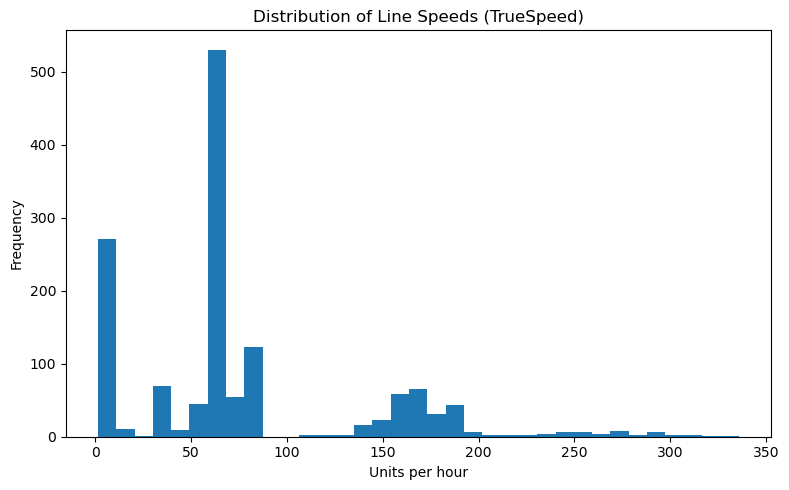

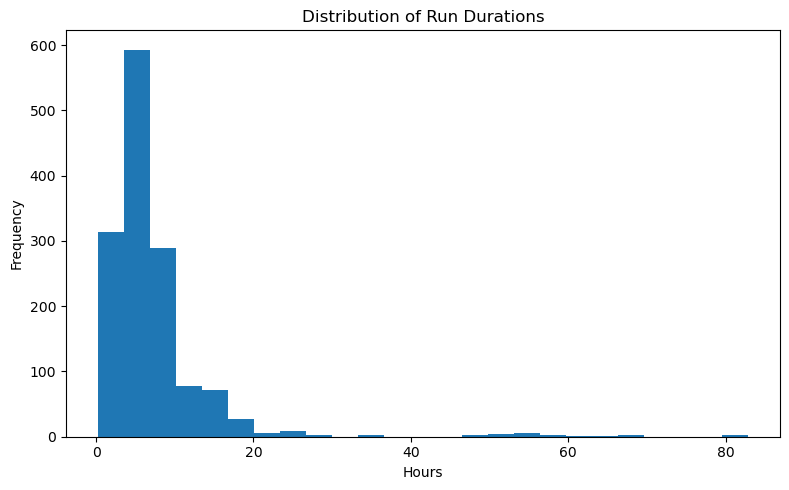

AttributeError: 'numpy.float64' object has no attribute 'sort_values'

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def hist(series, title, xlabel, bins=30):
    s = pd.to_numeric(series, errors="coerce").dropna()
    plt.figure(figsize=(8,5)); plt.hist(s, bins=bins)
    plt.title(title); plt.xlabel(xlabel); plt.ylabel("Frequency"); plt.tight_layout(); plt.show()

def bar_group_mean(group_col, value_col, title, ylabel, top=None, ascending=False):
    g = (
        df.groupby(group_col)[value_col]
        .apply(lambda x: pd.to_numeric(x, errors="coerce")).mean()
        .sort_values(ascending=ascending).dropna()
    )
    if top: g = g.head(top)
    plt.figure(figsize=(10,5)); g.plot(kind="bar")
    plt.title(title); plt.ylabel(ylabel); plt.tight_layout(); plt.show()

def bar_group_std(group_col, value_col, title, xlabel):
    g = (
        df.groupby(group_col)[value_col]
        .apply(lambda x: pd.to_numeric(x, errors="coerce").std())
        .sort_values().dropna()
    )
    plt.figure(figsize=(10,5)); g.plot(kind="barh")
    plt.title(title); plt.xlabel(xlabel); plt.tight_layout(); plt.show()

# 1) Speed distribution (units/hr while running)
hist(df["TrueSpeed"], "Distribution of Line Speeds (TrueSpeed)", "Units per hour", bins=35)

# 2) Run-duration distribution
hist(df["RunDuration_hr"], "Distribution of Run Durations", "Hours", bins=25)

# 3) Avg throughput by WorkCenter (kg/hr)
bar_group_mean("WorkCenter", "ThroughputSpeed", "Average Throughput (kg/hr) by WorkCenter", "kg per hour")

# 4) Avg utilization by WorkCenter
bar_group_mean("WorkCenter", "Utilization_%", "Average Utilization by WorkCenter", "Utilization (%)", ascending=True)

# 5) Speed stability (std dev) by WorkCenter
bar_group_std("WorkCenter", "TrueSpeed", "Speed Variability (Std Dev) by WorkCenter", "Std Dev (units/hr)")

# 6) Top 10 SKUs by throughput
bar_group_mean("ProductCode", "ThroughputSpeed", "Top 10 SKUs by Throughput (kg/hr)", "kg per hour", top=10)

# 7) Speed vs utilization scatter
x = pd.to_numeric(df["Utilization_%"], errors="coerce")
y = pd.to_numeric(df["TrueSpeed"], errors="coerce")
m = (~x.isna()) & (~y.isna())
plt.figure(figsize=(7,5)); plt.scatter(x[m], y[m], s=12)
plt.title("TrueSpeed vs Utilization"); plt.xlabel("Utilization (%)"); plt.ylabel("TrueSpeed (units/hr)")
plt.tight_layout(); plt.show()


In [23]:
def bar_group_mean(group_col, value_col, title, ylabel, top=None, ascending=False):
    # Ensure the target column is numeric
    df[value_col] = pd.to_numeric(df[value_col], errors="coerce")

    # Compute group-wise means (returns a Series)
    g = df.groupby(group_col)[value_col].mean().dropna()

    # Sort values properly
    g = g.sort_values(ascending=ascending)

    # Limit to top N if specified
    if top:
        g = g.head(top)

    # Plot
    plt.figure(figsize=(10,5))
    g.plot(kind="bar")
    plt.title(title)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()


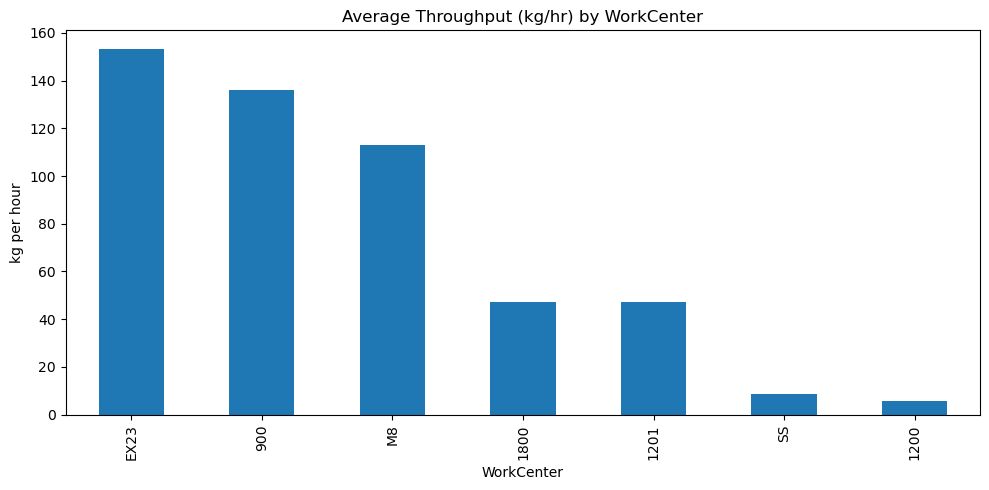

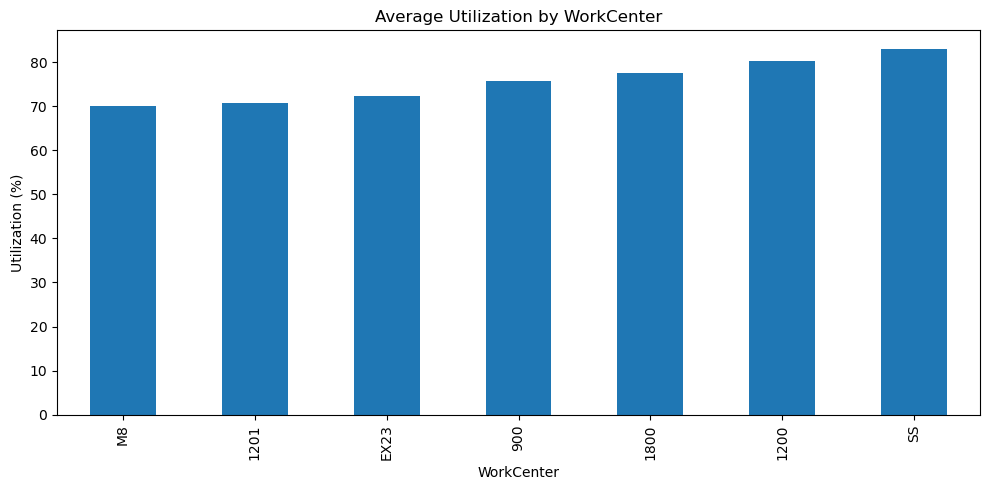

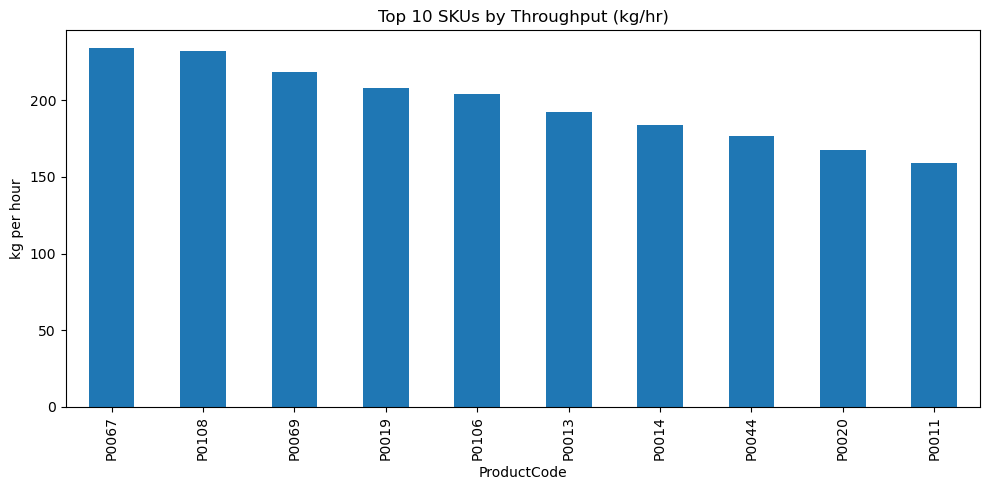

In [24]:
bar_group_mean("WorkCenter", "ThroughputSpeed", "Average Throughput (kg/hr) by WorkCenter", "kg per hour")
bar_group_mean("WorkCenter", "Utilization_%", "Average Utilization by WorkCenter", "Utilization (%)", ascending=True)
bar_group_mean("ProductCode", "ThroughputSpeed", "Top 10 SKUs by Throughput (kg/hr)", "kg per hour", top=10)
